<a href="https://colab.research.google.com/github/amun83/Koscom-Financial-Data-Bootcamp/blob/master/FD104_Text_Mining_OilPrice_com_News_Articles_Step_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# II. Text Mining

In [0]:
ON_COLAB  = True
DATA_PATH = ''

In [0]:
!pip install -q --upgrade pandas_datareader
!pip install -q --upgrade finance-datareader
!pip install -q --upgrade html5lib
!pip install -q --upgrade lxml
!pip install -q --upgrade seaborn
!pip install -q --upgrade gspread

In [0]:
# utilities
import datetime
import re
import csv
from IPython.display import display

# web scraping
import requests
import urllib.parse
from bs4 import BeautifulSoup as bs
import pandas_datareader as pdr
import FinanceDataReader as fdr

# Math/Stat
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
#import math

# Machine Learning
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM

# visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
if ON_COLAB :
  from google.colab import drive
  drive.mount('/gdrive')
  DATA_PATH = '/gdrive/My Drive/oilprice.com/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
with open(DATA_PATH + 'oilprice.com_news_20181218.csv', 'r') as f:
  fr = csv.reader(f)
  news = [ a for a in fr]

text = [a[2] for a in news]
print(len(text))

all_text = ' '.join([a[2] for a in news])
print(len(all_text))

8652
19220172


In [0]:
!pip install -q --upgrade nltk
!pip install -q --upgrade textblob
!pip install -q --upgrade wordcloud
!pip install -q --upgrade spacy
!python -m spacy download en
!python -m textblob.download_corpora


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [0]:
import nltk
nltk.download()  # type 'd' and 'brown'
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
import spacy
nlp = spacy.load('en')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> brown


      Package brown is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


# NLP Libs: ~~NLTK~~, TextBlob, SpaCy

# Word Cloud

In [0]:
blob = TextBlob(all_text)
nouns = [n for n, t in blob.tags if t == 'NN']

In [0]:
count = Counter(nouns)
tags = count.most_common(50)

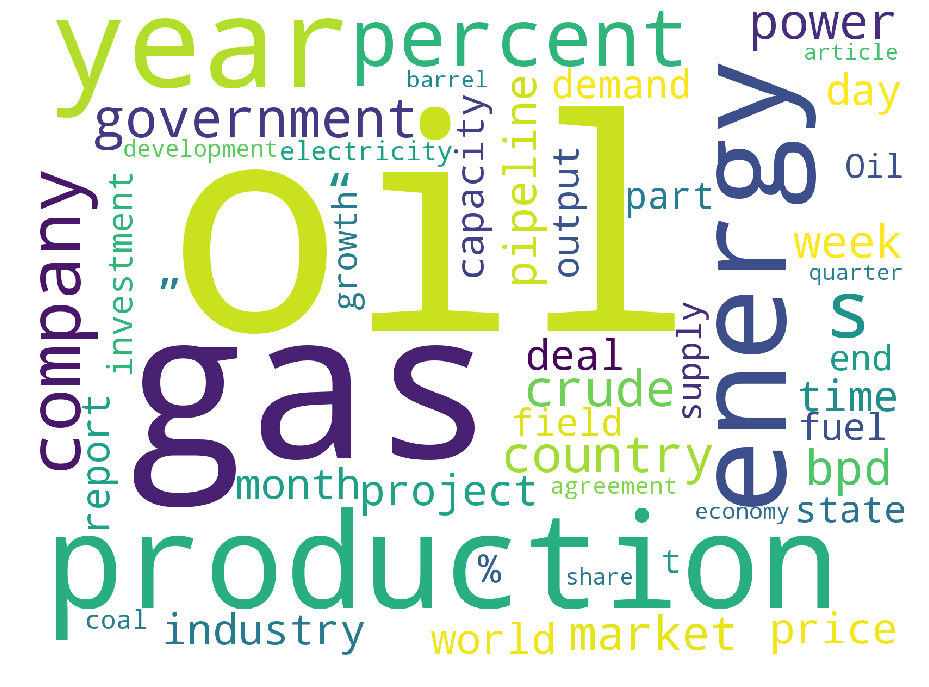

In [0]:
wc = WordCloud(background_color='white', width=1600, height=1200)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(16,12))
plt.axis('off')
plt.imshow(cloud)

In [0]:
import textblob
noun_phrases = textblob.blob.WordList([])

for t in text:
  noun_phrases += TextBlob(t).noun_phrases

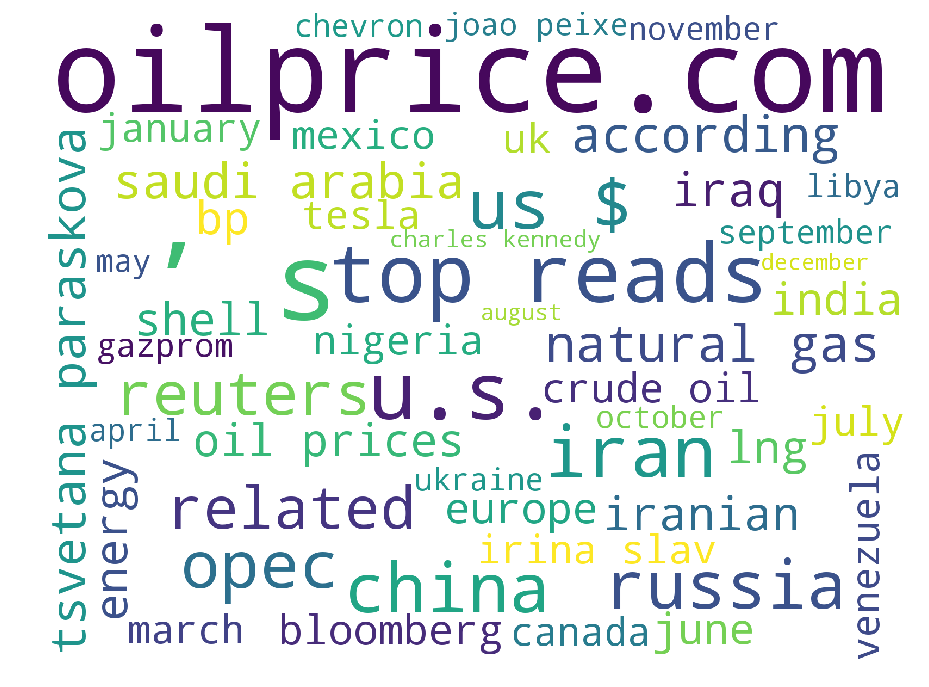

In [0]:
nouns = noun_phrases

count = Counter(nouns)
tags = count.most_common(50)

wc = WordCloud(background_color='white', width=1600, height=1200)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(16,12))
plt.axis('off')
plt.imshow(cloud)

# Sentiment Analysis
 * polarity
 * subjectivity

In [0]:
blobs = [TextBlob(t) for t in text]

In [0]:
sentiments = [t.sentiment for t in blobs]
sentiments[:10]

[Sentiment(polarity=0.06807142857142857, subjectivity=0.4021428571428572),
 Sentiment(polarity=0.04586363636363637, subjectivity=0.5275454545454545),
 Sentiment(polarity=0.06960016835016836, subjectivity=0.42771043771043765),
 Sentiment(polarity=0.16061355311355313, subjectivity=0.45706043956043957),
 Sentiment(polarity=0.13131377551020407, subjectivity=0.3724914965986394),
 Sentiment(polarity=0.07103535353535353, subjectivity=0.3903956228956229),
 Sentiment(polarity=0.13575396825396827, subjectivity=0.38932539682539685),
 Sentiment(polarity=-0.10030487804878048, subjectivity=0.5036585365853659),
 Sentiment(polarity=0.0907142857142857, subjectivity=0.3545238095238096),
 Sentiment(polarity=0.09429292929292929, subjectivity=0.40921717171717165)]

# WTI Price Chart with Sentiments

## Tutorial: Building a Text Classification System
 * https://textblob.readthedocs.io/en/dev/classifiers.html#classifiers

[Sentiment(polarity=0.06807142857142857, subjectivity=0.4021428571428572),
 Sentiment(polarity=0.04586363636363637, subjectivity=0.5275454545454545),
 Sentiment(polarity=0.06960016835016836, subjectivity=0.42771043771043765),
 Sentiment(polarity=0.16061355311355313, subjectivity=0.45706043956043957),
 Sentiment(polarity=0.13131377551020407, subjectivity=0.3724914965986394),
 Sentiment(polarity=0.07103535353535353, subjectivity=0.3903956228956229),
 Sentiment(polarity=0.13575396825396827, subjectivity=0.38932539682539685),
 Sentiment(polarity=-0.10030487804878048, subjectivity=0.5036585365853659),
 Sentiment(polarity=0.0907142857142857, subjectivity=0.3545238095238096),
 Sentiment(polarity=0.09429292929292929, subjectivity=0.40921717171717165)]

# spaCy
 * Named Entity Recognition
   * https://spacy.io/api/annotation#section-named-entities

In [0]:
import spacy
from spacy import displacy

!python -m spacy download custom_ner_model


    Compatibility error
    No compatible model found for 'custom_ner_model' (spaCy v2.0.18).



In [0]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text[-2])
#displacy.render(doc, style='dep', jupyter=True)
displacy.render(doc, style='ent', jupyter=True)

In [0]:
!pip list | grep ner

chainer                  5.0.0                
prefetch-generator       1.0.1                
simplegeneric            0.8.1                
sortedcontainers         2.1.0                
